In [7]:
# 对于SVM，存在一个分类面，两个点集到此平面的最小距离最大，两个点集中的边缘点到此平面的距离最大。

import numpy as np
from matplotlib import colors
from sklearn import svm 
from sklearn import model_selection
import matplotlib.pyplot as plt
import matplotlib as mpl



In [8]:
# *************将字符串转为整型，便于数据加载***********************
# 在函数中建立一个对应字典就可以了，输入字符串，输出字符串对应的数字。
def iris_type(s):
    #     print(type(s))
    # 字符串加个b是指btypes 字节串类型
    it = {b'Iris-setosa': 0, b'Iris-versicolor': 1, b'Iris-virginica': 2}
    return it[s]


# 加载数据
data_path = './dataset/Iris/Iris.data'  # 数据文件的路径
data = np.loadtxt(data_path,  # 数据文件路径
                  dtype=float,  # 数据类型
                  delimiter=',',  # 数据分隔符
                  converters={4: iris_type})  # 将第5列使用函数iris_type进行转换
# print(data)                                                 #data为二维数组，data.shape=(150, 5)
# print(data.shape)
# 数据分割
x, y = np.split(data,  # 要切分的数组
                (4,),  # 沿轴切分的位置，第5列开始往后为y
                axis=1)  # 1代表纵向分割，按列分割

x = x[:, 0:2]
# 第一个逗号之前表示行，只有冒号表示所有行，第二个冒号0:2表是0,1两列
# 在X中我们取前两列作为特征，为了后面的可视化，原始的四维不好画图。x[:,0:4]代表第一维(行)全取，第二维(列)取0~2
# print(x)
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x,  # 所要划分的样本特征集
    y,  # 所要划分的样本结果
    random_state=1,  # 随机数种子确保产生的随机数组相同
    test_size=0.3)  # 测试样本占比


In [9]:
# create model
# **********************SVM分类器构建*************************
def classifier():
    #clf = svm.SVC(C=0.8,kernel='rbf', gamma=50,decision_function_shape='ovr')
    clf = svm.SVC(C=0.5,  # 误差项惩罚系数,默认值是1
                  kernel='linear',  # 线性核 kenrel="rbf":高斯核
                  decision_function_shape='ovr')  # 决策函数
    return clf


# 2.定义模型：SVM模型定义
clf = classifier()


In [10]:
# 模型训练

y_train.ravel()  # ravel()扁平化，将原来的二维数组转换为一维数组
# ***********************训练模型*****************************


def train(clf, x_train, y_train):
    clf.fit(x_train,  # 训练集特征向量，fit表示输入数据开始拟合
            y_train.ravel())  # 训练集目标值 ravel()扁平化，将原来的二维数组转换为一维数组


# 3.训练SVM模型
train(clf, x_train, y_train)


In [11]:
# **************并判断a b是否相等，计算acc的均值*************
def show_accuracy(a, b, tip):
    acc = a.ravel() == b.ravel()
    print('%s Accuracy:%.3f' % (tip, np.mean(acc)))


def print_accuracy(clf, x_train, y_train, x_test, y_test):
    # 分别打印训练集和测试集的准确率  score(x_train,y_train):表示输出x_train,y_train在模型上的准确率
    print('trianing prediction:%.3f' % (clf.score(x_train, y_train)))
    print('test data prediction:%.3f' % (clf.score(x_test, y_test)))
    # 原始结果与预测结果进行对比   predict()表示对x_train样本进行预测，返回样本类别
    show_accuracy(clf.predict(x_train), y_train, 'traing data')
    show_accuracy(clf.predict(x_test), y_test, 'testing data')
    # 计算决策函数的值，表示x到各分割平面的距离,3类，所以有3个决策函数，不同的多类情况有不同的决策函数？
    print('decision_function:\n', clf.decision_function(x_train))


# 4.模型评估
print_accuracy(clf, x_train, y_train, x_test, y_test)


trianing prediction:0.819
test data prediction:0.778
traing data Accuracy:0.819
testing data Accuracy:0.778
decision_function:
 [[-0.30200388  1.26702365  2.28292526]
 [ 2.1831931  -0.19913458  1.06956422]
 [ 2.25424706  0.79489006 -0.20587224]
 [ 2.22927055  0.98556708 -0.22777916]
 [ 0.95815482  2.18401419 -0.17375192]
 [ 2.23120771  0.84075865 -0.19144453]
 [ 2.17327158 -0.14884286  0.92795057]
 [-0.28667175  1.11372202  2.28302495]
 [-0.27989264  1.21274017  2.25881762]
 [-0.29313813  1.24442795  2.2732035 ]
 [-0.27008816  1.2272086   2.22682127]
 [-0.25981661  2.21998499  1.20479842]
 [-0.17071168  0.99542159  2.17180911]
 [-0.30018876  1.25829325  2.2829419 ]
 [-0.17539342  2.15368837  1.06772814]
 [ 2.25702986  0.81715893 -0.22763295]
 [-0.23988847  2.23286001  1.06656755]
 [-0.26915223  2.23333222  1.21679709]
 [ 2.22927055  0.98556708 -0.22777916]
 [ 2.2530903   0.85932358 -0.2359772 ]
 [-0.26740532  1.20784059  2.23528903]
 [ 2.26803658  0.80468578 -0.24299359]
 [-0.24030826 

grid_test:
 [[4.3       2.       ]
 [4.3       2.0120603]
 [4.3       2.0241206]
 ...
 [7.9       4.3758794]
 [7.9       4.3879397]
 [7.9       4.4      ]]
the distance to decision plane:
 [[ 2.17689921  1.23467171 -0.25941323]
 [ 2.17943684  1.23363096 -0.25941107]
 [ 2.18189345  1.23256802 -0.25940892]
 ...
 [-0.27958977  0.83621535  2.28683228]
 [-0.27928358  0.8332275   2.28683314]
 [-0.27897389  0.83034313  2.28683399]]
grid_hat:
 [0. 0. 0. ... 2. 2. 2.]


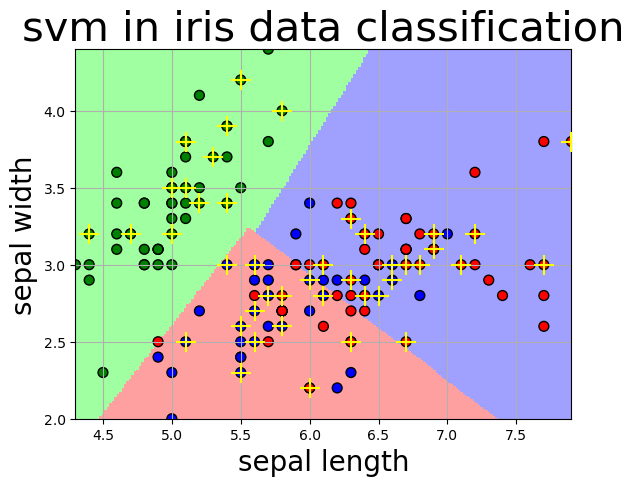

In [12]:
# 可视化及使用
def draw(clf, x):
    iris_feature = 'sepal length', 'sepal width', 'petal lenght', 'petal width'
    # 开始画图
    x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
    x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
    # 生成网格采样点 开始坐标：结束坐标（不包括）：步长
    x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]
    # flat将二维数组转换成1个1维的迭代器，然后把x1和x2的所有可能值给匹配成为样本点
    # stack():沿着新的轴加入一系列数组，竖着（按列）增加两个数组，grid_test的shape：(40000, 2)
    grid_test = np.stack((x1.flat, x2.flat), axis=1)
    print('grid_test:\n', grid_test)
    # 输出样本到决策面的距离
    z = clf.decision_function(grid_test)
    print('the distance to decision plane:\n', z)

    # 预测分类值 得到【0,0.。。。2,2,2】
    grid_hat = clf.predict(grid_test)
    print('grid_hat:\n', grid_hat)
    # reshape grid_hat和x1形状一致
    grid_hat = grid_hat.reshape(x1.shape)
    # 若3*3矩阵e，则e.shape()为3*3,表示3行3列
    # light是网格测试点的配色，相当于背景
    # dark是样本点的配色
    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'b', 'r'])
    # 画出所有网格样本点被判断为的分类，作为背景
    # pcolormesh(x,y,z,cmap)这里参数代入
    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
    # x1，x2，grid_hat，cmap=cm_light绘制的是背景。
    # squeeze()把y的个数为1的维度去掉，也就是变成一维。
    plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(
        y), edgecolor='k', s=50, cmap=cm_dark)  # 样本点
    plt.scatter(x_test[:, 0], x_test[:, 1], s=200,
                facecolor='yellow', zorder=10, marker='+')       # 测试点
    plt.xlabel(iris_feature[0], fontsize=20)
    plt.ylabel(iris_feature[1], fontsize=20)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title('svm in iris data classification', fontsize=30)
    plt.grid()
    plt.show()


# 5.模型使用
draw(clf, x)
